In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## DataSet

In [2]:
data=pd.read_csv('MentalHealthSurvey new.csv')
data.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Female,17,PU,Undergraduate,Computer Science,1st year,3.5-4.0,On-Campus,No,No Sports,...,4,5,5,5,1,5,5,5,3,Sleep
1,Female,17,PU,Undergraduate,Computer Science,1st year,3.5-4.0,On-Campus,No,No Sports,...,4,4,4,5,3,4,4,5,2,Religious Activities
2,Male,17,PU,Undergraduate,Information Technology,1st year,0.0-0.0,Off-Campus,No,7+ times,...,3,5,5,1,3,4,4,4,5,Outdoor Activities
3,Male,18,PU,Undergraduate,Data Science,1st year,2.5-3.0,Off-Campus,No,4-6 times,...,4,3,4,4,4,3,4,4,2,"Sports and Fitness, Creative Outlets, Online E..."
4,Male,18,PU,Undergraduate,Data Science,1st year,3.5-4.0,Off-Campus,No,No Sports,...,5,3,1,1,3,1,2,2,1,Sleep


In [3]:
data.dtypes

gender                      object
age                          int64
university                  object
degree_level                object
degree_major                object
academic_year               object
cgpa                        object
residential_status          object
campus_discrimination       object
sports_engagement           object
average_sleep               object
study_satisfaction           int64
academic_workload            int64
academic_pressure            int64
financial_concerns           int64
social_relationships         int64
depression                   int64
anxiety                      int64
isolation                    int64
future_insecurity            int64
stress_relief_activities    object
dtype: object

In [ ]:
def extract_avg_sleep(sleep_str):
    try:
        parts = sleep_str.split('-')
        low = int(parts[0])
        high = int(parts[1].split()[0])  # حذف " hrs" إذا موجودة
        return (low + high) / 2
    except:
        return None

data['average_sleep_num'] = data['average_sleep'].apply(extract_avg_sleep)

In [5]:
data.max()

gender                                                                   Male
age                                                                        26
university                                                                 VU
degree_level                                                    Undergraduate
degree_major                                             Software Engineering
academic_year                                                        4th year
cgpa                                                                  3.5-4.0
residential_status                                                  On-Campus
campus_discrimination                                                     Yes
sports_engagement                                                   No Sports
average_sleep                                                         7-8 hrs
study_satisfaction                                                          5
academic_workload                                               

## Inputs

In [6]:
academic_workload = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'academic_workload')
social_relationships = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'social_relationships')
average_sleep = ctrl.Antecedent(np.arange(0, 13, 1), 'average_sleep')
financial_concerns = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'financial_concerns')
academic_pressure = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'academic_pressure')
age = ctrl.Antecedent(np.arange(17, 31, 1), 'age')

In [7]:
# Academic Workload → مثلثي (trimf) (منطقي لأنه يزيد بشكل خطي)
academic_workload['light'] = fuzz.trimf(academic_workload.universe, [0, 0, 2.5])
academic_workload['moderate'] = fuzz.trimf(academic_workload.universe, [1.5, 2.5, 4])
academic_workload['heavy'] = fuzz.trimf(academic_workload.universe, [3, 5, 5])

# Social Relationships → غاوسي (gaussmf) لأنه يمثل الاستقرار النفسي تدريجيًا
social_relationships['poor'] = fuzz.gaussmf(social_relationships.universe, 1, 0.8)
social_relationships['average'] = fuzz.gaussmf(social_relationships.universe, 2.5, 0.8)
social_relationships['strong'] = fuzz.gaussmf(social_relationships.universe, 4, 0.8)

# Average Sleep → شبه منحرف (trapmf) لأنه القيمة المثالية واضحة (5–8 ساعات)
average_sleep['low'] = fuzz.trapmf(average_sleep.universe, [0, 0, 3, 6])
average_sleep['adequate'] = fuzz.trapmf(average_sleep.universe, [5, 6, 8, 10])
average_sleep['oversleep'] = fuzz.trapmf(average_sleep.universe, [9, 10, 12, 12])

# Financial Concerns → مثلثي
financial_concerns['low'] = fuzz.trimf(financial_concerns.universe, [0, 0, 2])
financial_concerns['medium'] = fuzz.trimf(financial_concerns.universe, [1.5, 2.5, 4])
financial_concerns['high'] = fuzz.trimf(financial_concerns.universe, [3, 5, 5])

# Academic Pressure → شبه منحرف (تراكم الضغط واضح ببطء ثم بسرعة)
academic_pressure['low'] = fuzz.trapmf(academic_pressure.universe, [0, 0, 1.5, 2])
academic_pressure['medium'] = fuzz.trapmf(academic_pressure.universe, [1.5, 2.5, 3.5, 4])
academic_pressure['high'] = fuzz.trapmf(academic_pressure.universe, [3.5, 4.2, 5, 5])

# Age → غاوسي (لأنه طبيعي نعتبر العمر موزّع على شكل جرس)
age['young'] = fuzz.gaussmf(age.universe, 18, 1.5)
age['typical'] = fuzz.gaussmf(age.universe, 22, 2)
age['older'] = fuzz.gaussmf(age.universe, 27, 2)

c:\Users\HP\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


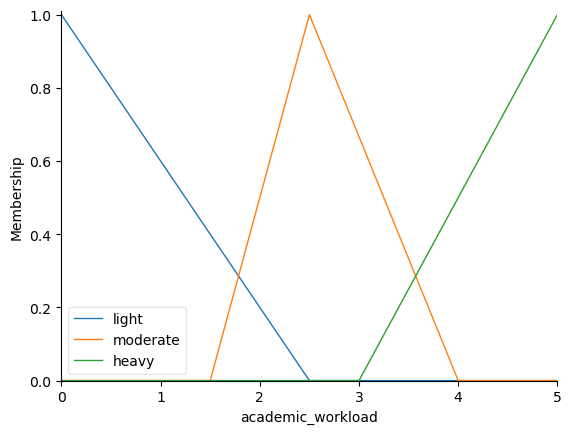

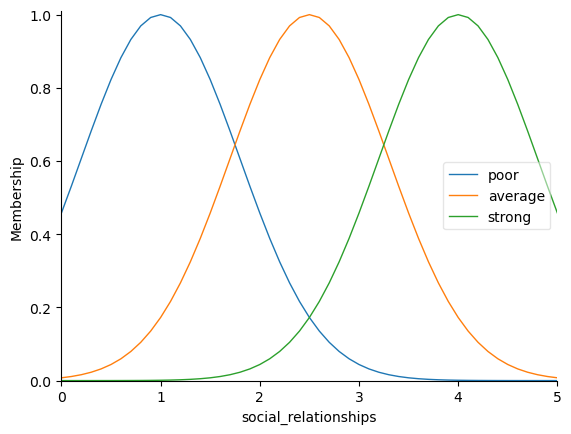

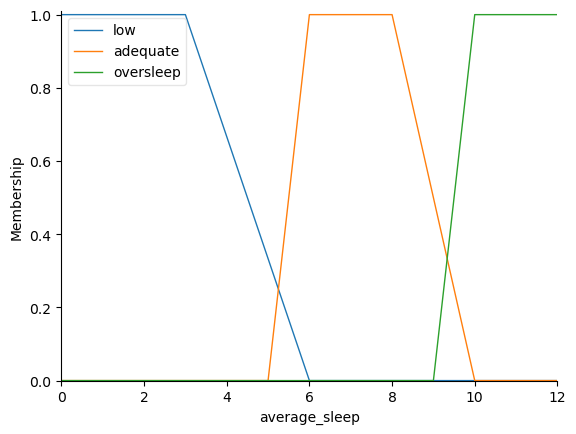

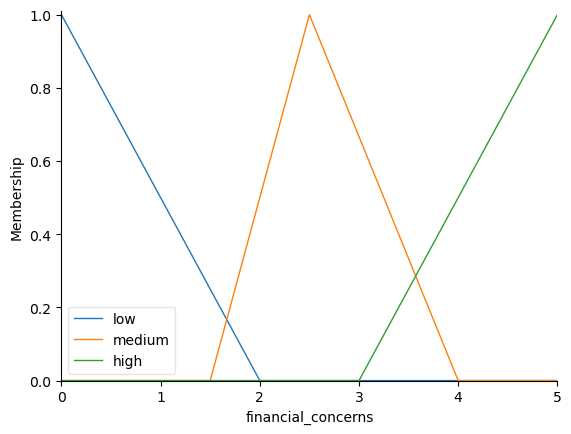

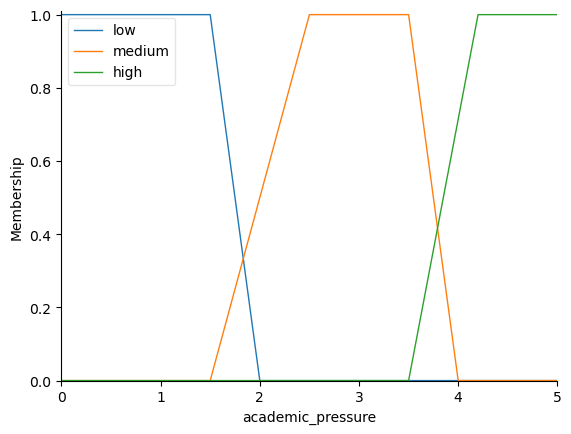

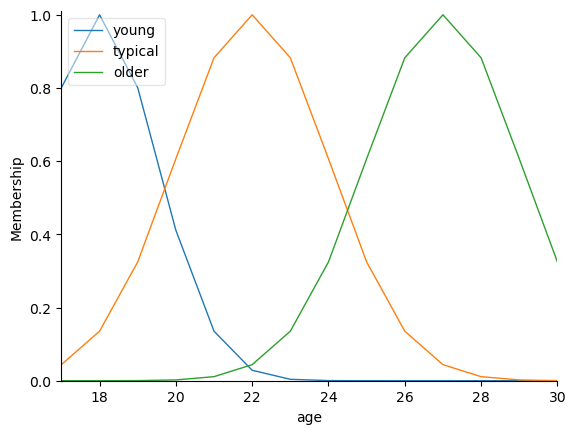

In [8]:
academic_workload.view()
social_relationships.view()
average_sleep.view()
financial_concerns.view()
academic_pressure.view()
age.view()

## Outputs

In [9]:
depression = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'depression')
anxiety = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'anxiety')
isolation = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'isolation')
future_insecurity = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'future_insecurity')

In [ ]:

depression['none'] = fuzz.trapmf(depression.universe, [0, 0, 0.5, 1.2])
depression['mild'] = fuzz.trimf(depression.universe, [0.8, 1.8, 2.5])
depression['moderate'] = fuzz.trimf(depression.universe, [2.2, 3.0, 3.8])
depression['severe'] = fuzz.trapmf(depression.universe, [3.5, 4.2, 5, 5])

anxiety['low'] = fuzz.gaussmf(anxiety.universe, 1, 0.7)
anxiety['medium'] = fuzz.gaussmf(anxiety.universe, 2.5, 0.7)
anxiety['high'] = fuzz.gaussmf(anxiety.universe, 4, 0.7)

isolation['connected'] = fuzz.trapmf(isolation.universe, [0, 0, 0.8, 1.5])
isolation['neutral'] = fuzz.trimf(isolation.universe, [1.2, 2.5, 3.8])
isolation['isolated'] = fuzz.trapmf(isolation.universe, [3.5, 4.2, 5, 5])


future_insecurity['secure'] = fuzz.trapmf(future_insecurity.universe, [0, 0, 1, 2])
future_insecurity['unsure'] = fuzz.trimf(future_insecurity.universe, [1.5, 2.8, 4])
future_insecurity['very_insecure'] = fuzz.trapmf(future_insecurity.universe, [3.5, 4.2, 5, 5])

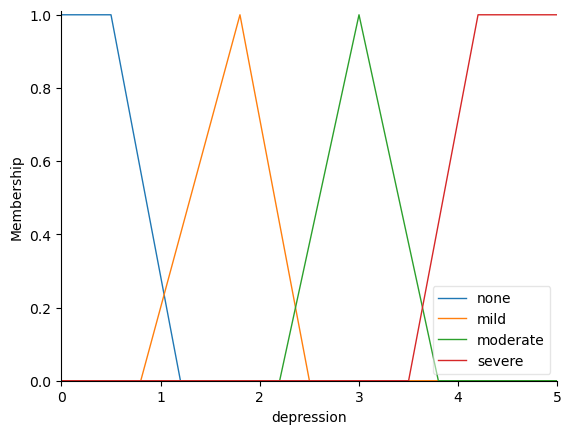

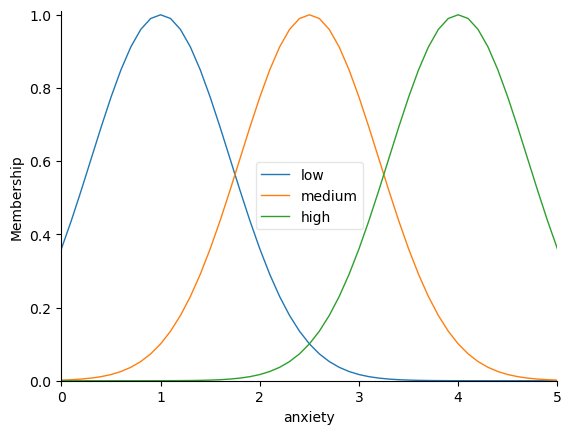

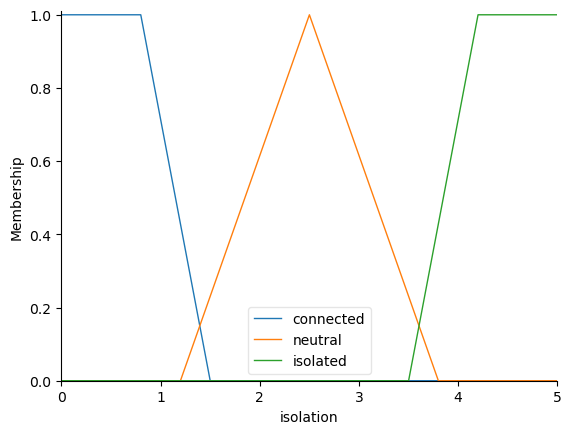

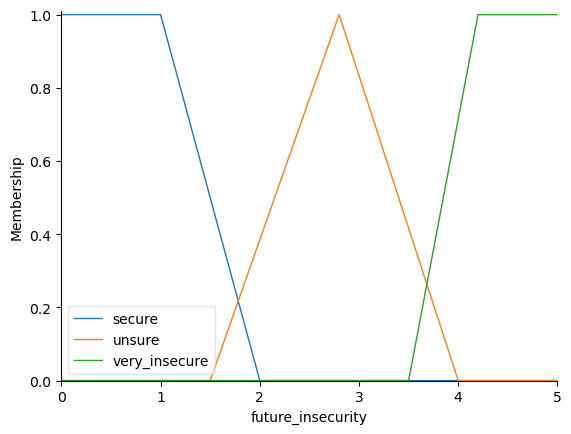

In [11]:
depression.view()
anxiety.view()
isolation.view()
future_insecurity.view()

## Rules

In [ ]:
rule1 = ctrl.Rule(academic_workload['heavy'] & social_relationships['poor'] & average_sleep['low'],
                  consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

rule2 = ctrl.Rule(academic_workload['moderate'] & social_relationships['average'] & average_sleep['adequate'],
                  consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])

rule3 = ctrl.Rule(academic_workload['light'] & social_relationships['strong'] & average_sleep['adequate'],
                  consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule4 = ctrl.Rule(financial_concerns['high'] & academic_pressure['high'],
                  consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

rule5 = ctrl.Rule(age['older'] & social_relationships['poor'],
                  consequent=[depression['moderate'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])

rule6 = ctrl.Rule(academic_workload['heavy'] & financial_concerns['medium'] & average_sleep['low'],
                  consequent=[depression['moderate'], anxiety['high'], isolation['isolated'], future_insecurity['unsure']])

rule7 = ctrl.Rule(social_relationships['strong'] & average_sleep['oversleep'],
                  consequent=[depression['mild'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule8 = ctrl.Rule(academic_pressure['medium'] & financial_concerns['low'] & age['young'],
                  consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['secure']])

rule9 = ctrl.Rule(academic_workload['moderate'] & social_relationships['poor'] & average_sleep['adequate'],
                  consequent=[depression['moderate'], anxiety['high'], isolation['neutral'], future_insecurity['unsure']])

rule10 = ctrl.Rule(financial_concerns['medium'] & academic_pressure['medium'] & age['typical'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])

rule11 = ctrl.Rule(academic_workload['light'] & social_relationships['average'] & average_sleep['low'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])

rule12 = ctrl.Rule(financial_concerns['high'] & average_sleep['low'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

rule13 = ctrl.Rule(social_relationships['poor'] & average_sleep['low'] & academic_pressure['high'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

rule14 = ctrl.Rule(academic_workload['moderate'] & social_relationships['strong'] & average_sleep['adequate'],
                   consequent=[depression['mild'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule15 = ctrl.Rule(age['young'] & financial_concerns['low'] & social_relationships['strong'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])
rule16 = ctrl.Rule(academic_pressure['low'] & financial_concerns['low'] & social_relationships['strong'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule17 = ctrl.Rule(academic_workload['heavy'] & social_relationships['average'] & average_sleep['low'],
                   consequent=[depression['moderate'], anxiety['high'], isolation['neutral'], future_insecurity['unsure']])

rule18 = ctrl.Rule(age['typical'] & financial_concerns['medium'] & academic_pressure['high'],
                   consequent=[depression['moderate'], anxiety['high'], isolation['neutral'], future_insecurity['unsure']])

rule19 = ctrl.Rule(social_relationships['poor'] & average_sleep['adequate'] & academic_pressure['medium'],
                   consequent=[depression['moderate'], anxiety['medium'], isolation['isolated'], future_insecurity['unsure']])

rule20 = ctrl.Rule(academic_workload['light'] & financial_concerns['low'] & average_sleep['oversleep'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule21 = ctrl.Rule(academic_workload['heavy'] & financial_concerns['high'] & average_sleep['low'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

rule22 = ctrl.Rule(social_relationships['poor'] & academic_pressure['high'] & age['older'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])


rule23 = ctrl.Rule(average_sleep['adequate'] & social_relationships['average'] & academic_workload['moderate'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])

rule24 = ctrl.Rule(financial_concerns['medium'] & academic_pressure['medium'] & age['typical'],
                   consequent=[depression['moderate'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])


rule25 = ctrl.Rule(age['young'] & social_relationships['strong'] & average_sleep['oversleep'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])


rule26 = ctrl.Rule(academic_workload['light'] & financial_concerns['low'] & academic_pressure['low'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])


rule27 = ctrl.Rule(social_relationships['poor'] & average_sleep['low'] & academic_workload['moderate'],
                   consequent=[depression['moderate'], anxiety['high'], isolation['isolated'], future_insecurity['unsure']])


rule28 = ctrl.Rule(financial_concerns['high'] & academic_pressure['medium'] & average_sleep['low'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])


rule29 = ctrl.Rule(academic_pressure['low'] & social_relationships['strong'] & average_sleep['adequate'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])


rule30 = ctrl.Rule(age['older'] & financial_concerns['medium'] & social_relationships['average'],
                   consequent=[depression['moderate'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])


rule31 = ctrl.Rule(academic_workload['heavy'] & social_relationships['poor'] & academic_pressure['high'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])


rule32 = ctrl.Rule(financial_concerns['low'] & average_sleep['oversleep'] & age['young'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])


rule33 = ctrl.Rule(academic_pressure['medium'] & social_relationships['average'] & average_sleep['adequate'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])


rule34 = ctrl.Rule(social_relationships['strong'] & financial_concerns['low'] & average_sleep['adequate'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])

rule35 = ctrl.Rule(age['typical'] & academic_workload['moderate'] & academic_pressure['medium'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])


rule36 = ctrl.Rule(average_sleep['low'] & social_relationships['poor'] & financial_concerns['high'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])


rule37 = ctrl.Rule(academic_workload['light'] & social_relationships['strong'] & financial_concerns['low'],
                   consequent=[depression['none'], anxiety['low'], isolation['connected'], future_insecurity['secure']])


rule38 = ctrl.Rule(academic_pressure['high'] & age['older'] & financial_concerns['medium'],
                   consequent=[depression['moderate'], anxiety['high'], isolation['neutral'], future_insecurity['unsure']])


rule39 = ctrl.Rule(social_relationships['average'] & academic_workload['moderate'] & average_sleep['adequate'],
                   consequent=[depression['mild'], anxiety['medium'], isolation['neutral'], future_insecurity['unsure']])


rule40 = ctrl.Rule(academic_workload['heavy'] & average_sleep['low'] & financial_concerns['high'],
                   consequent=[depression['severe'], anxiety['high'], isolation['isolated'], future_insecurity['very_insecure']])

In [13]:
rules_list = []
for i in range(1, 41):
    rules_list.append(eval(f"rule{i}"))
mental_health_ctrl = ctrl.ControlSystem(rules_list)

## Build The Expert System using Fuzzy Logic

Depression: 3.87
Anxiety: 3.79
Isolation: 3.45
Future Insecurity: 3.60


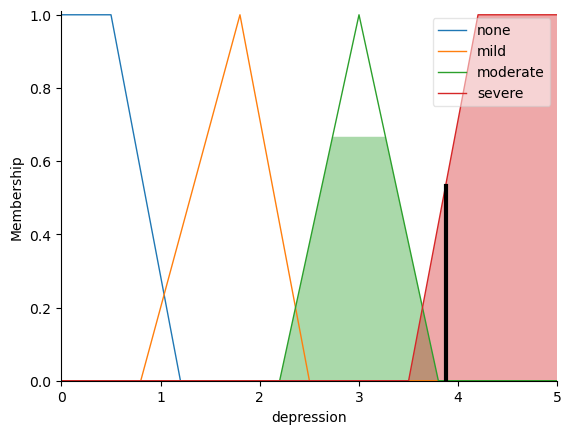

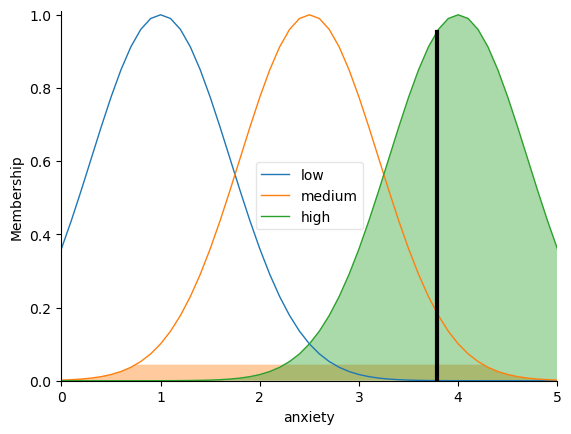

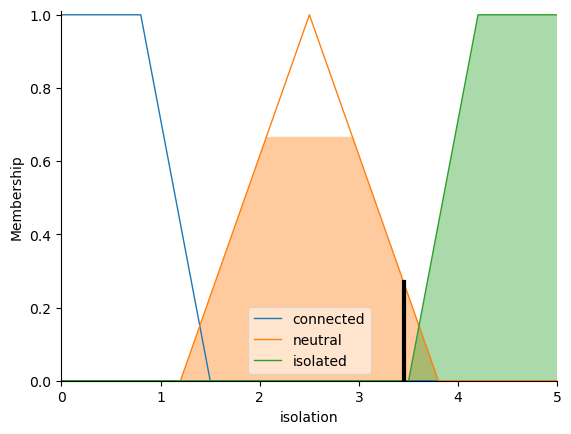

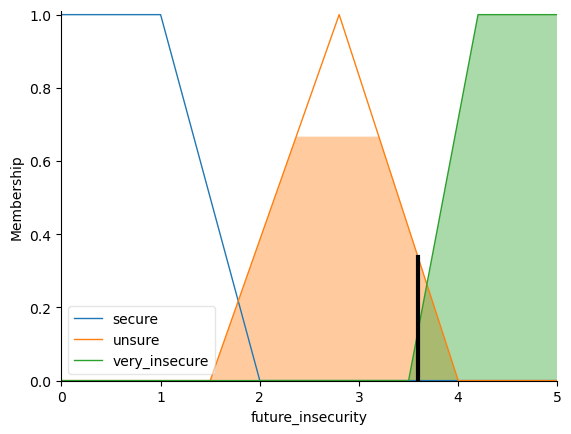

In [ ]:


mental_health_sim = ctrl.ControlSystemSimulation(mental_health_ctrl)



mental_health_sim.input['academic_workload'] = 7
mental_health_sim.input['social_relationships'] = 3
mental_health_sim.input['average_sleep'] = 4
mental_health_sim.input['financial_concerns'] = 8
mental_health_sim.input['academic_pressure'] = 7
mental_health_sim.input['age'] = 25



mental_health_sim.compute()



print(f"Depression: {mental_health_sim.output['depression']:.2f}")
print(f"Anxiety: {mental_health_sim.output['anxiety']:.2f}")
print(f"Isolation: {mental_health_sim.output['isolation']:.2f}")
print(f"Future Insecurity: {mental_health_sim.output['future_insecurity']:.2f}")



depression.view(sim=mental_health_sim)
anxiety.view(sim=mental_health_sim)
isolation.view(sim=mental_health_sim)
future_insecurity.view(sim=mental_health_sim)


## Evaluation 

In [ ]:
pred_depression = []
pred_anxiety = []
pred_isolation = []
pred_future_insecurity = []


for idx, row in data.iterrows():
    try:
       
        mental_health_sim.input['academic_workload'] = float(row['academic_workload'])
        mental_health_sim.input['academic_pressure'] = float(row['academic_pressure'])
        mental_health_sim.input['financial_concerns'] = float(row['financial_concerns'])
        mental_health_sim.input['social_relationships'] = float(row['social_relationships'])
        mental_health_sim.input['average_sleep'] = float(row['average_sleep_num'])
        mental_health_sim.input['age'] = float(row['age'])
        
        mental_health_sim.compute()
        

        pred_depression.append(mental_health_sim.output['depression'])
        pred_anxiety.append(mental_health_sim.output['anxiety'])
        pred_isolation.append(mental_health_sim.output['isolation'])
        pred_future_insecurity.append(mental_health_sim.output['future_insecurity'])
    except:
        pred_depression.append(np.nan)
        pred_anxiety.append(np.nan)
        pred_isolation.append(np.nan)
        pred_future_insecurity.append(np.nan)

data['pred_depression'] = pred_depression
data['pred_anxiety'] = pred_anxiety
data['pred_isolation'] = pred_isolation
data['pred_future_insecurity'] = pred_future_insecurity


## RMSE 

In [16]:
from sklearn.metrics import mean_squared_error
import math

rmse_depression = math.sqrt(mean_squared_error(data['depression'], data['pred_depression']))
rmse_anxiety = math.sqrt(mean_squared_error(data['anxiety'], data['pred_anxiety']))
rmse_isolation = math.sqrt(mean_squared_error(data['isolation'], data['pred_isolation']))
rmse_future_insecurity = math.sqrt(mean_squared_error(data['future_insecurity'], data['pred_future_insecurity']))

print(f"RMSE Depression: {rmse_depression:.3f}")
print(f"RMSE Anxiety: {rmse_anxiety:.3f}")
print(f"RMSE Isolation: {rmse_isolation:.3f}")
print(f"RMSE Future Insecurity: {rmse_future_insecurity:.3f}")

RMSE Depression: 1.368
RMSE Anxiety: 1.387
RMSE Isolation: 1.386
RMSE Future Insecurity: 1.503


RMSE Depression: 1.800
RMSE Anxiety: 2.848
RMSE Isolation: 1.395
RMSE Future Insecurity: 3.656
RMSE Depression: 1.575
RMSE Anxiety: 1.221
RMSE Isolation: 1.424
RMSE Future Insecurity: 1.502

## R2

In [17]:
from sklearn.metrics import r2_score

r2_depression = r2_score(data['depression'], data['pred_depression'])
r2_anxiety = r2_score(data['anxiety'], data['pred_anxiety'])
r2_isolation = r2_score(data['isolation'], data['pred_isolation'])
r2_future_insecurity = r2_score(data['future_insecurity'], data['pred_future_insecurity'])

print(f"R2 Depression: {r2_depression:.3f}")
print(f"R2 Anxiety: {r2_anxiety:.3f}")
print(f"R2 Isolation: {r2_isolation:.3f}")
print(f"R2 Future Insecurity: {r2_future_insecurity:.3f}")

R2 Depression: -0.012
R2 Anxiety: -0.155
R2 Isolation: 0.016
R2 Future Insecurity: -0.192


R2 Depression: -0.753
R2 Anxiety: -3.871
R2 Isolation: 0.004
R2 Future Insecurity: -6.050
R2 Depression: -0.342
R2 Anxiety: 0.104
R2 Isolation: -0.038
R2 Future Insecurity: -0.190

## Fuzzy Logic vs Machine Learning

In [18]:
features = ['academic_workload', 'academic_pressure', 'financial_concerns',
            'social_relationships', 'average_sleep_num', 'age']

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = data[features]
y = data[['depression', 'anxiety', 'isolation', 'future_insecurity']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


for i, col in enumerate(y.columns):
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"Decision Tree R² ({col}): {r2:.3f}")


Decision Tree R² (depression): -1.012
Decision Tree R² (anxiety): -1.719
Decision Tree R² (isolation): -0.735
Decision Tree R² (future_insecurity): -0.934


## RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = data[features]
y = data[['depression', 'anxiety', 'isolation', 'future_insecurity']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


for i, col in enumerate(y.columns):
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"Random Forest R² ({col}): {r2:.3f}")


Random Forest R² (depression): 0.469
Random Forest R² (anxiety): 0.181
Random Forest R² (isolation): 0.523
Random Forest R² (future_insecurity): -0.047
